In [1]:
import os.path
from dataset_analysis import *

# Test

In [2]:
# dataset_root_dir = './DATASET_ROOT'
# # dataset_dict_list = get_all_dicts(annotations_top_dir)

In [3]:
# annotation_path = os.path.join(dataset_root_dir,'annotations','0.xml')

In [4]:
# xml_dict = parse_single_annotation_file(xml_path=annotation_path)

In [5]:
# xml_dict

# Overall Statistics

In [6]:
dataset_root_dir = './DATASET_ROOT'

total_video_sequences = count_sequences(dataset_root_dir)
total_frames = 0

total_category_distribution_frame_level_dict = {}

sequence_length_distribution = {}

total_outside_distribution_frame_level_dict = {}
total_occlusion_distribution_frame_level_dict = {}
total_altitude_distribution_frame_level_dict = {}
total_illumination_distribution_frame_level_dict = {}
# total_keep_out_distribution_frame_level_dict = {}
# total_cam_movement_distribution_frame_level_dict = {}
total_scene_distribution_frame_level_dict = {}

In [7]:
def path_generator(dataset_root_dir, dataset_split_list):
    """
    A generator that yields the path of the annotation file, the path of the RGB folder and the path of the thermal folder.
    :param dataset_root_dir:
    :param dataset_split_list: e.g. [0,1,2,3,...]
    :return:
    """
    rgb_top_dir = os.path.join(dataset_root_dir, 'sequences', 'RGB')
    thermal_top_dir = os.path.join(dataset_root_dir, 'sequences', 'Thermal')
    annot_top_dir = os.path.join(dataset_root_dir, 'annotations')

    dataset_split_list_iter = tqdm(dataset_split_list, leave=False)
    dataset_split_list_iter.set_description('progress: ')
    for idx in dataset_split_list_iter:
        idx = int(idx)
        annot_path = os.path.join(annot_top_dir, f'{idx}.xml')
        rgb_dir = os.path.join(rgb_top_dir, f'{idx}')
        thermal_dir = os.path.join(thermal_top_dir, f'{idx}')

        yield idx, annot_path, rgb_dir, thermal_dir

In [8]:
def annot_dict_generator(dataset_root_dir, dataset_split_list):
    for idx, annot_path, _, _ in path_generator(dataset_root_dir, dataset_split_list):
        _xml_dict = parse_single_annotation_file(annot_path)
        yield _xml_dict, annot_path

In [9]:
def get_dataset_split_list(split_path):
    with open(split_path,'r') as f:
        split_list = f.readlines()
        # convert to int
        split_list = [int(x.strip()) for x in split_list]
    return split_list

In [10]:
def annotations_dict_generator(dataset_root_dir):
    """
    generator used for yielding xml dicts
    :param dataset_root_dir:
    :return:
    """
    dataset_split_list = get_dataset_split_list(os.path.join(dataset_root_dir,'all.txt'))
    for xml_dict, xml_path in annot_dict_generator(dataset_root_dir, dataset_split_list):
        yield xml_dict, xml_path
    #
    # annotation_dir = os.path.join(dataset_root_dir, "annotations")
    # top_level_iterator = tqdm(os.listdir(annotation_dir), leave=False)
    # top_level_iterator.set_description('progress: ')
    # for annotation_filename in top_level_iterator:
    #     # annotations_path = os.path.join(dataset_root_dir, annotations_path)
    #     # annotation_files_iterator = tqdm(os.listdir(annotations_path))
    #     # annotation_files_iterator.set_description('annotation files iterator progress: ')
    #     # annotation_files_iterator = os.listdir(annotations_path)
    #     # for annotation_filename in annotation_files_iterator:
    #     if not annotation_filename.endswith(".xml"):
    #         continue
    #     # parse annotation file
    #     xml_path = os.path.join(annotation_dir, annotation_filename)
    #     try:
    #         xml_dict = parse_single_annotation_file(xml_path)
    #     except Exception as e:  # if parsing failed, skip this file, print error, rename the file end with .error
    #         print("\033[1;31merror\033[0m")  # print bold "error" in red
    #         # print traceback
    #         traceback.print_exc()
    #         # rename xml file to end with .xml.error
    #         os.rename(xml_path, xml_path + '.error')
    #         continue
    #     yield xml_dict, xml_path

In [11]:
for count, (xml_dict, xml_path) in enumerate(annotations_dict_generator(dataset_root_dir)):
    # if count >= 30:
    #     break # for debug only
    try:
        # frames number update---------------------------------------------------------------------------------
        frames = count_frames_per_sequence(xml_dict)
        total_frames += frames
        sequence_length_distribution[f'{count}'] = frames
        # frame-level category distribution--------------------------------------------------------------------
        category_count_frame_level_dict = count_category_occurrences_frame_level_per_sequence(xml_dict)
        total_category_distribution_frame_level_dict = merge_dicts(
            total_category_distribution_frame_level_dict,
            category_count_frame_level_dict
        )
        # frame-level attribute distribution--------------------------------------------------------------------
        outside_distribution_frame_level_dict, occlusion_distribution_frame_level_dict, altitude_distribution_frame_level_dict, illumination_distribution_frame_level_dict, scene_distribution_frame_level_dict = count_attribute_occurrence_frame_level_per_sequence(
            xml_dict)
    except Exception as e:
        print("\033[1;31merror\033[0m")  # print bold "error" in red
        traceback.print_exc()
        print(f"xml file:{xml_path}")

    total_outside_distribution_frame_level_dict = merge_dicts(total_outside_distribution_frame_level_dict,
                                                              outside_distribution_frame_level_dict)
    total_occlusion_distribution_frame_level_dict = merge_dicts(total_occlusion_distribution_frame_level_dict,
                                                                occlusion_distribution_frame_level_dict)
    total_altitude_distribution_frame_level_dict = merge_dicts(total_altitude_distribution_frame_level_dict,
                                                               altitude_distribution_frame_level_dict)
    total_illumination_distribution_frame_level_dict = merge_dicts(total_illumination_distribution_frame_level_dict,
                                                                   illumination_distribution_frame_level_dict)
    total_scene_distribution_frame_level_dict = merge_dicts(total_scene_distribution_frame_level_dict,
                                                            scene_distribution_frame_level_dict)

In [12]:
total_video_sequences

120

In [13]:
total_frames

75826

In [14]:
sequence_length_distribution

{'0': 540,
 '1': 538,
 '2': 541,
 '3': 542,
 '4': 621,
 '5': 585,
 '6': 551,
 '7': 533,
 '8': 530,
 '9': 536,
 '10': 553,
 '11': 555,
 '12': 550,
 '13': 551,
 '14': 534,
 '15': 543,
 '16': 543,
 '17': 536,
 '18': 536,
 '19': 618,
 '20': 543,
 '21': 595,
 '22': 542,
 '23': 570,
 '24': 581,
 '25': 593,
 '26': 503,
 '27': 511,
 '28': 470,
 '29': 510,
 '30': 549,
 '31': 959,
 '32': 769,
 '33': 983,
 '34': 942,
 '35': 584,
 '36': 282,
 '37': 615,
 '38': 577,
 '39': 561,
 '40': 942,
 '41': 970,
 '42': 932,
 '43': 579,
 '44': 948,
 '45': 675,
 '46': 503,
 '47': 662,
 '48': 604,
 '49': 761,
 '50': 947,
 '51': 543,
 '52': 549,
 '53': 609,
 '54': 599,
 '55': 688,
 '56': 579,
 '57': 673,
 '58': 567,
 '59': 556,
 '60': 561,
 '61': 555,
 '62': 925,
 '63': 671,
 '64': 919,
 '65': 928,
 '66': 595,
 '67': 983,
 '68': 992,
 '69': 585,
 '70': 534,
 '71': 574,
 '72': 568,
 '73': 532,
 '74': 539,
 '75': 584,
 '76': 564,
 '77': 629,
 '78': 995,
 '79': 552,
 '80': 512,
 '81': 638,
 '82': 559,
 '83': 570,
 '

In [15]:
total_category_distribution_frame_level_dict

{'person': 2673067, 'cycle': 292074, 'car': 3190305}

In [16]:
total_altitude_distribution_frame_level_dict

{'30m': 20707, '60m': 21620, '90m': 17045, '120m': 16454}

In [17]:
total_illumination_distribution_frame_level_dict

{'bright_light': 74738, 'weak_light': 1088}

In [18]:
total_occlusion_distribution_frame_level_dict

{'0': 6048291, '1': 107155}

In [19]:
total_outside_distribution_frame_level_dict

{'0': 1282725, '1': 4872721}

In [20]:
# total_keep_out_distribution_frame_level_dict

In [21]:
# total_cam_movement_distribution_frame_level_dict

In [22]:
total_scene_distribution_frame_level_dict

{'street': 64084, 'stadium': 11742}

In [23]:
count_error_files(dataset_root_dir)

0

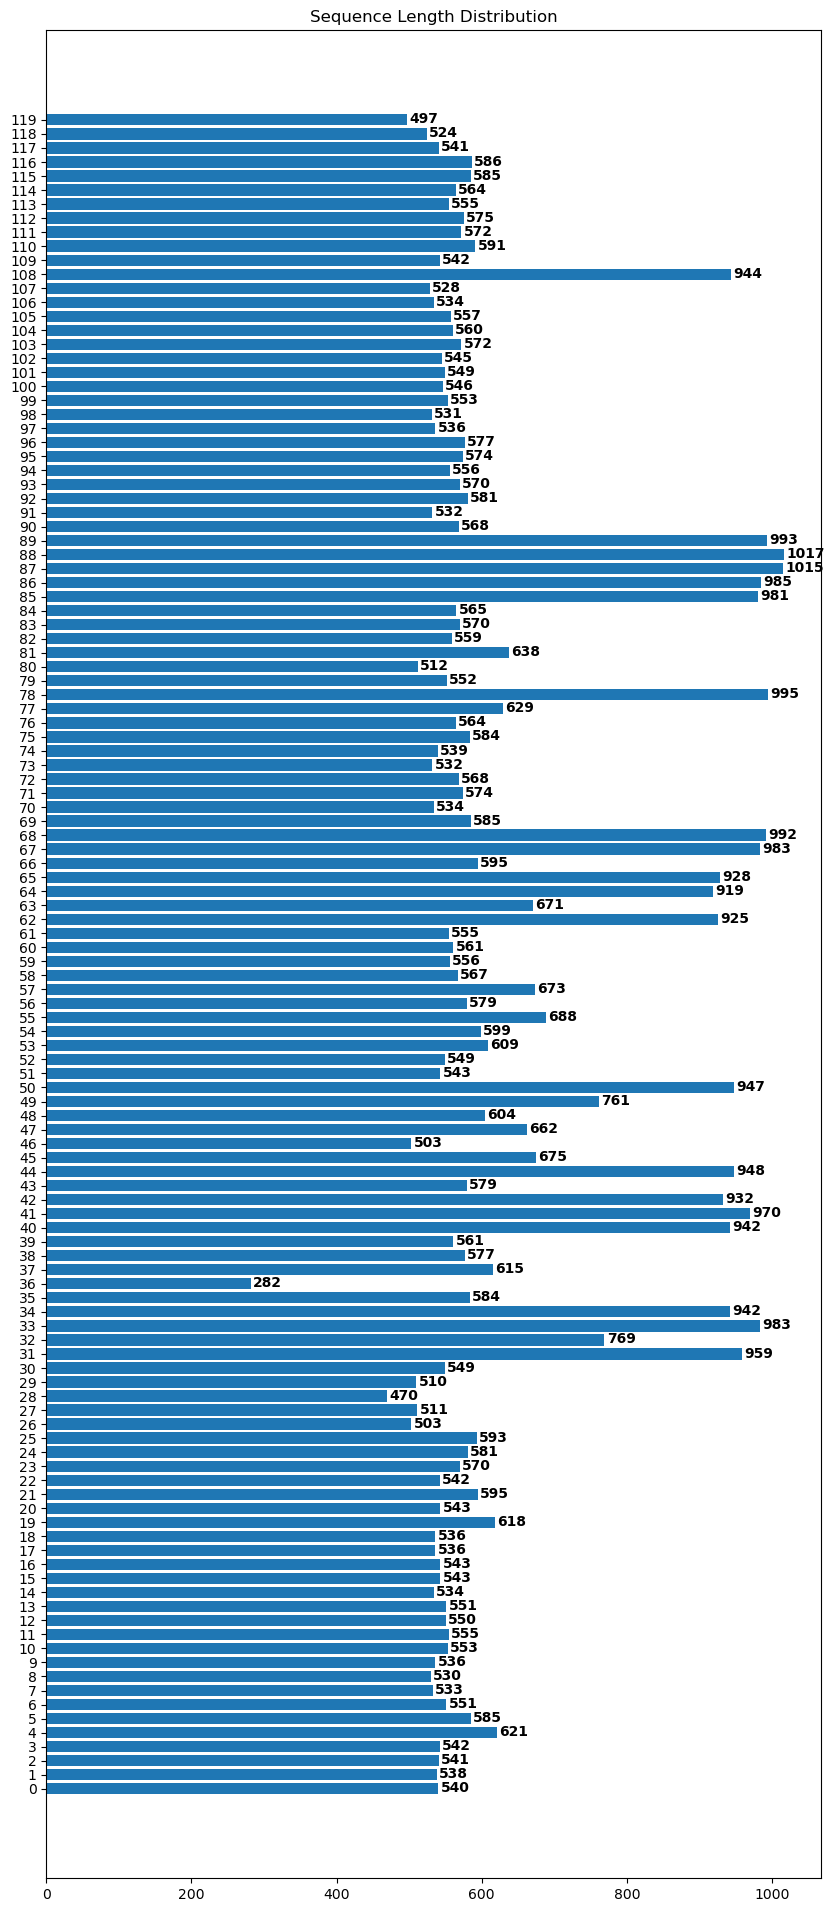

In [24]:
draw_bar_chart(sequence_length_distribution, title="Sequence Length Distribution")

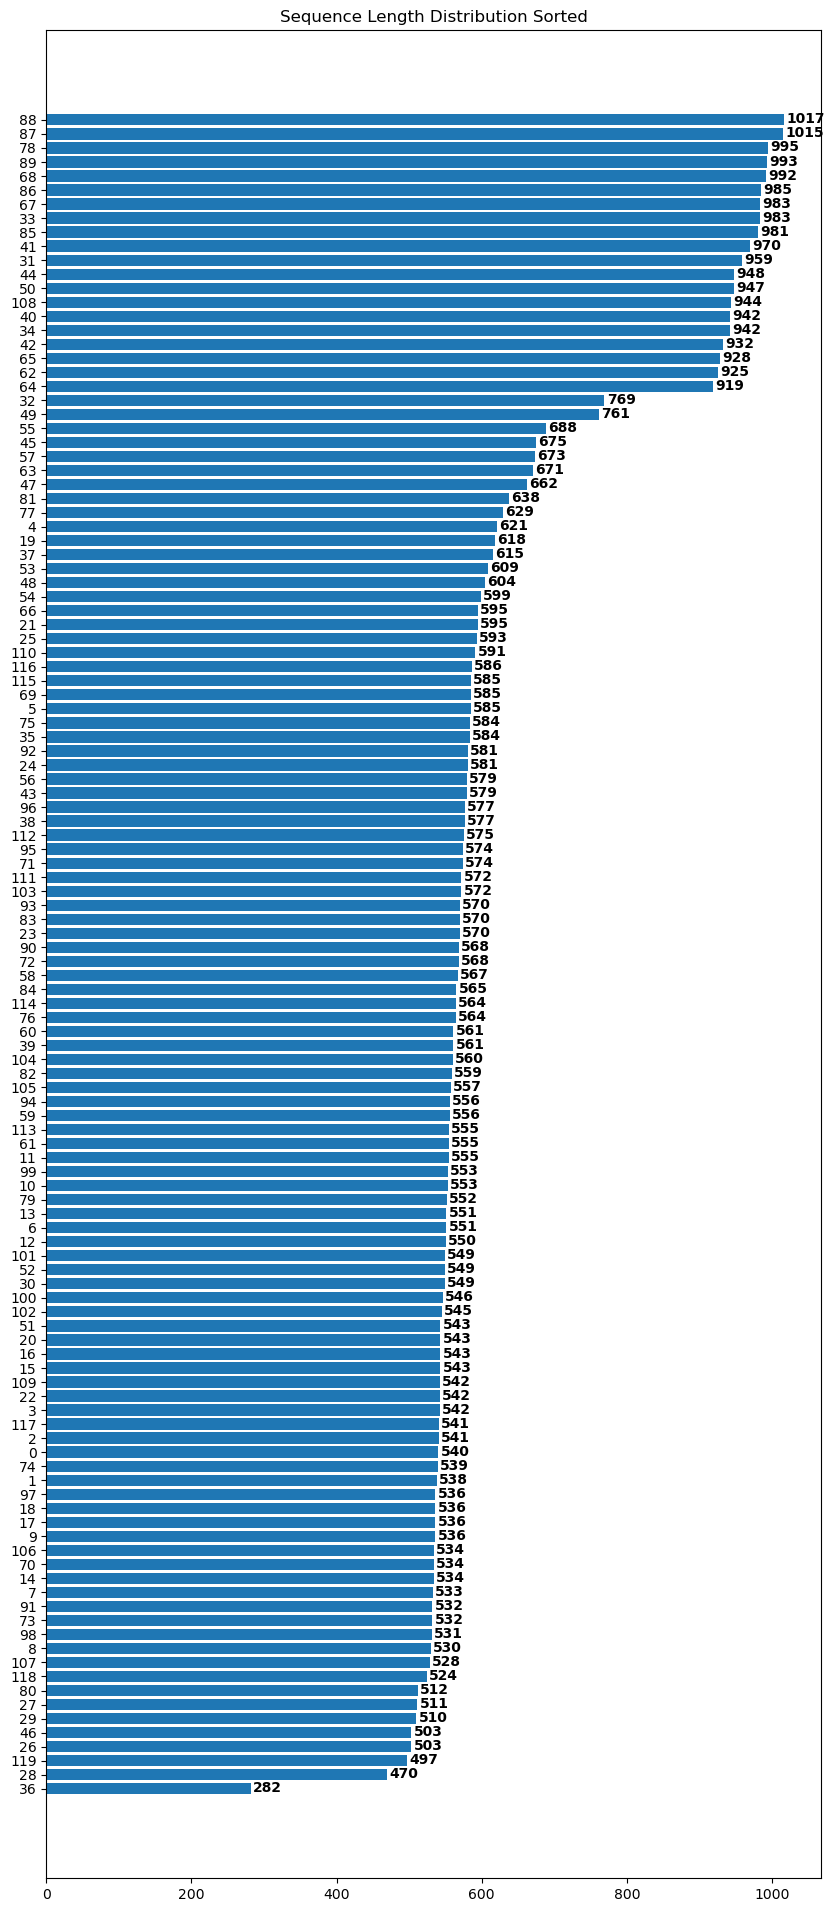

In [25]:
draw_bar_chart(dict(sorted(sequence_length_distribution.items(),key=lambda x:x[1])), title="Sequence Length Distribution Sorted")

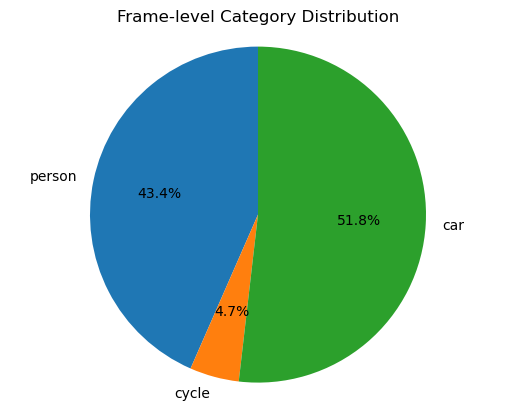

In [26]:
draw_pie_chart(total_category_distribution_frame_level_dict, title="Frame-level Category Distribution")

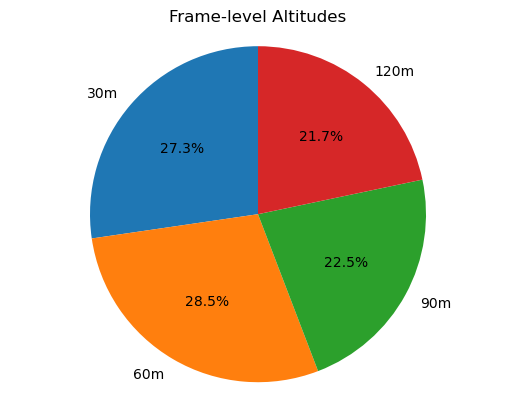

In [27]:
draw_pie_chart(total_altitude_distribution_frame_level_dict, title="Frame-level Altitudes")

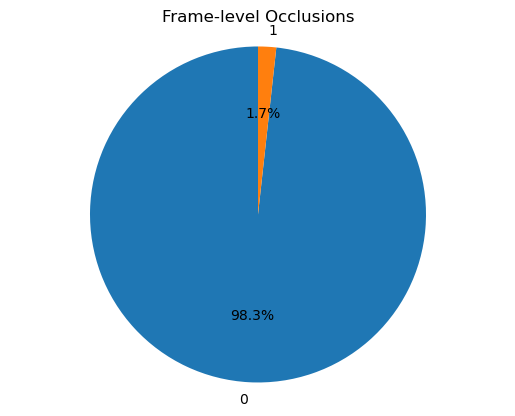

In [28]:
draw_pie_chart(total_occlusion_distribution_frame_level_dict, title="Frame-level Occlusions")

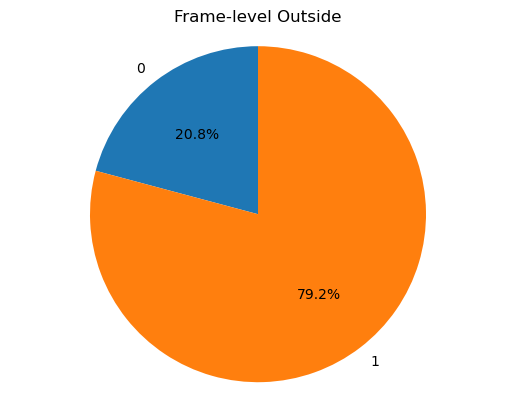

In [29]:
draw_pie_chart(total_outside_distribution_frame_level_dict, title="Frame-level Outside")

In [30]:
# draw_pie_chart(total_keep_out_distribution_frame_level_dict, title="Frame-level Keep-out")

In [31]:
# draw_pie_chart(total_cam_movement_distribution_frame_level_dict, title="Frame-level Cam Movement")

# Dataset Split

In [32]:
get_dataset_split_list('D:\\Project_repository\\RGBT_multi_dataset\\DATASET_ROOT\\test.txt')

[]

In [33]:
# with open('D:\\Project_repository\\RGBT_multi_dataset\\DATASET_ROOT\\all.txt','w') as f:
#     for i in range(120):
#         f.write(str(i)+'\n')

## Split

In [33]:
sorted_thermal_len_dict = dict(sorted(sequence_length_distribution.items(),key=lambda x:x[1]))
# count total
total = 0
for key, val in sorted_thermal_len_dict.items():
    total += val

# proportion
train_num = int(total * 0.6 + 0.5)
val_num = int(total * 0.3 + 0.5)
test_num = total - train_num - val_num

train_list = []
val_list = []
test_list = []
for key, val in sorted_thermal_len_dict.items():
    if train_num > 0:  # train
        train_list.append(key)
        train_num -= val
    elif val_num > 0:  # val
        val_list.append(key)
        val_num -= val
    else:  # test
        test_list.append(key)

train_txt_path = os.path.join(dataset_root_dir,'train.txt')
val_txt_path = os.path.join(dataset_root_dir,'val.txt')
test_txt_path = os.path.join(dataset_root_dir,'test.txt')



